# <font color='E84855'>'Spotify's Most Played All-Time: For You' Guide Questions</font>

# <font color='1db954'>Overview of Dataset</font>

#    <font color='535353'>How many rows and columns does the dataset contain?</font>

In [4]:
import pandas as pd # importing pandaas library alias as pd
import matplotlib.pyplot as plt # imported a matplotlib for the creation of charts with the alias as plt 

pd.set_option('display.max_rows', None) # set the maximum rows output to none for displaying all the outputs.
spotify = pd.read_csv("spotify-2023.csv", encoding='latin-1')# reading the file of spotify-2023. The latin-1 is used because continuation byte is invalid.

num_rows,num_columns = spotify.shape # to get the number of rows and columns in the csv file
print(f'The number of rows in the dataset is: {num_rows}') # total number of rows
print(f'The number of columns in the dataset is: {num_columns}') # total number of columns

The number of rows in the dataset is: 953
The number of columns in the dataset is: 24


### <font color='255C99'>The number of rows in the dataset is 953 and the number of columns in the dataset is 24.</font>

# <font color='535353'>What are the Data types of each column?</font>

In [8]:
data_types = spotify.dtypes # Used .dtypes to get the data types of each coloums
print("Data types of each column:")
print(data_types)

Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


### <font color='255C99'>The data types of each column are:</font>

track_name              object;
artist(s)_name          object;
artist_count             int64;
released_year            int64;
released_month           int64;
released_day             int64;
in_spotify_playlists     int64;
in_spotify_charts        int64;
streams                 object;
in_apple_playlists       int64;
in_apple_charts          int64;
in_deezer_playlists     object;
in_deezer_charts         int64;
in_shazam_charts        object;
bpm                      int64;
key                     object;
mode                    object;
danceability_%           int64;
valence_%                int64;
energy_%                 int64;
acousticness_%           int64;
instrumentalness_%       int64;
liveness_%               int64; and
speechiness_%            int64.

# <font color='535353'>Are there any missing values?</font>

In [12]:
missing_values = spotify.isnull().sum() # To check if there are no value inside a cell in csv
missing_values = missing_values[missing_values > 0] # If null, then count
print(f"Missing values in each column: \n{missing_values}")

Missing values in each column: 
in_shazam_charts    50
key                 95
dtype: int64


### <font color='255C99'>There are missing values in some columns such as.</font>
streams              1;
in_shazam_charts    50;
key                 95; and
dtype: int64.

# <font color='1db954'>Basic Descriptive Statistics.</font>

# <font color='535353'>What are the mean, median, and standard deviation of the streams column?</font>

In [17]:
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce') 
# pd.to_numeric is used to ensure that whole numbers and decimal numbers are gathered.
#errors='coerce' is used as a error handler wherein if the values aren't numbers, it will be ignored.

streams_mean = spotify['streams'].mean() # .mean is used to get the mean.
streams_median = spotify['streams'].median() # .median is used to get the median.
streams_standard_deviation = spotify['streams'].std() # .std is used to get the standard deviation

print(f"Mean of streams: {streams_mean}")
print(f"Median of streams: {streams_median}")
print(f"Standard deviation of streams: {streams_standard_deviation}")

Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.0388832


### <font color='255C99'>The mean of streams is 514137424.93907565, and the median of streams is 290530915.0, and the standard deviation of streams is 566856949.0388832</font>

# <font color='535353'>What is the distribution of released_year and artist_count? Are there any noticable trends or outliers?</font>

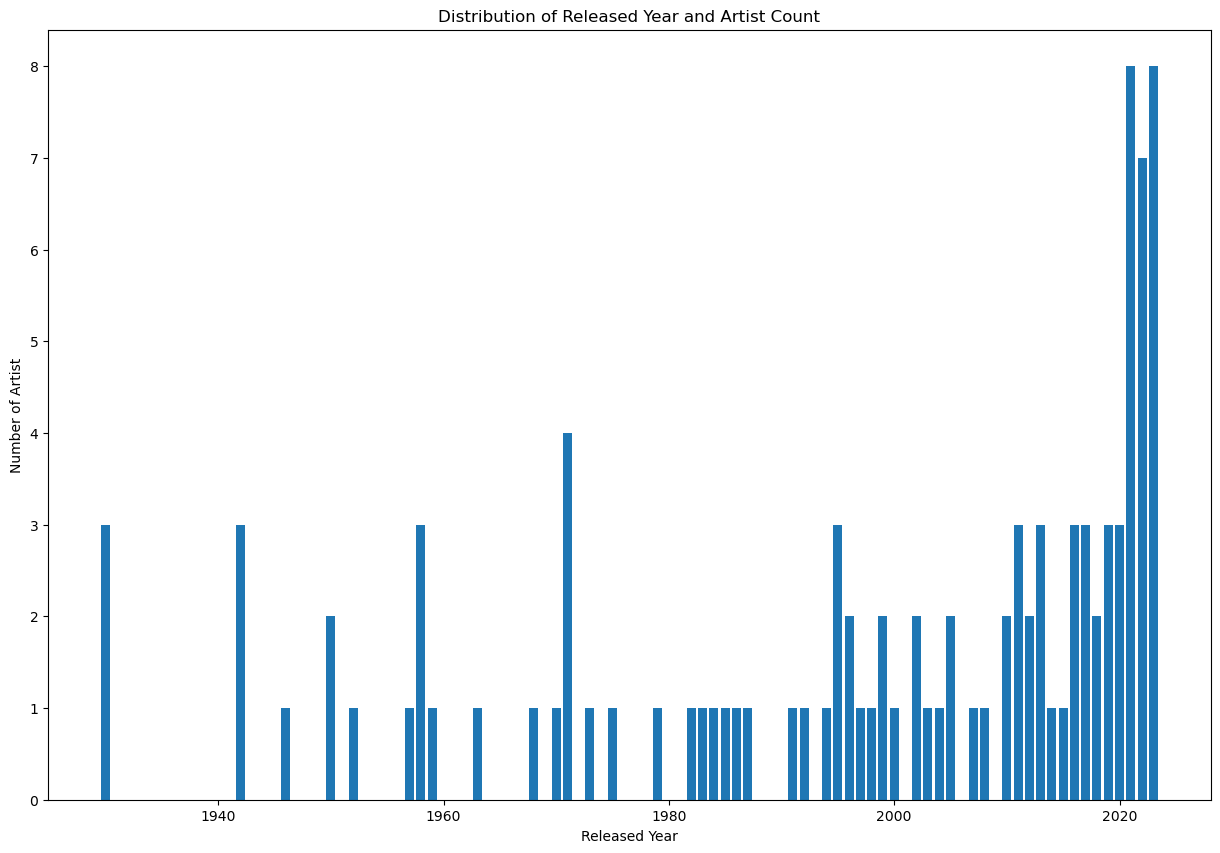

In [21]:
# With the use of matplotlib library, it will help me in the visualization of charts
# Making a bar chart for visual representation of the Distribution of Released Year and Artist Count
plt.figure(figsize=(15, 10))
plt.bar(spotify['released_year'], spotify['artist_count'])
#Bar is used to make a Bar chart
#Spotify['released_year'] is placed in the x-axis.
#Spotify['artist_count'] is placed in the y-axis.

plt.title('Distribution of Released Year and Artist Count')
plt.xlabel('Released Year')
plt.ylabel('Number of Artist')
plt.show()

### <font color='255C99'>With the use of scatter plot determines that the number of artists with multiple releases increases significantly from the 2000s with the highest count in recent year.</font>

# <font color='1db954'>Top Performers</font>

# <font color='535353'>Which track has the highest number of streams? Display the top 5 most streamed track?</font>

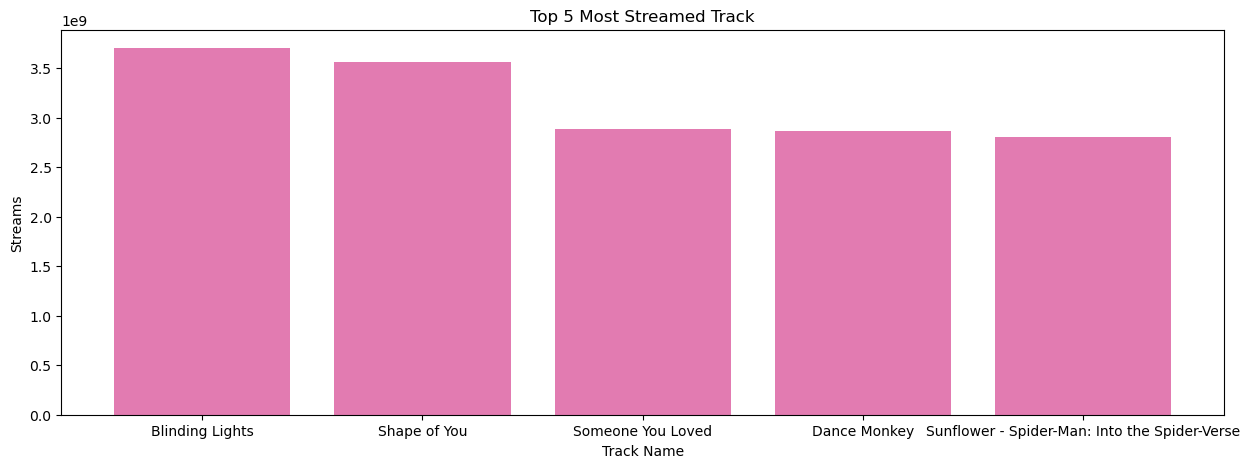

In [26]:
top_tracks = spotify.nlargest(5, 'streams')[['track_name', 'streams']] # .nlargest is used to get the highest number of streams.

# The bar chart displaying the top 5 streamed 
plt.figure(figsize=(15,5))
plt.bar(top_tracks['track_name'], top_tracks['streams'], color='#E27BB1')
plt.xlabel("Track Name")
plt.ylabel("Streams")
plt.title("Top 5 Most Streamed Track")
plt.show()

### <font color='255C99'>The top five(5) Most Streamed Track are: Blinding Lights, Shape of You, Someone You Loved, Dance Monkey, Sunflower.</font>

# <font color='535353'>Who are the top 5 most frequent artists based on the number of tracks in the dataset?</font>

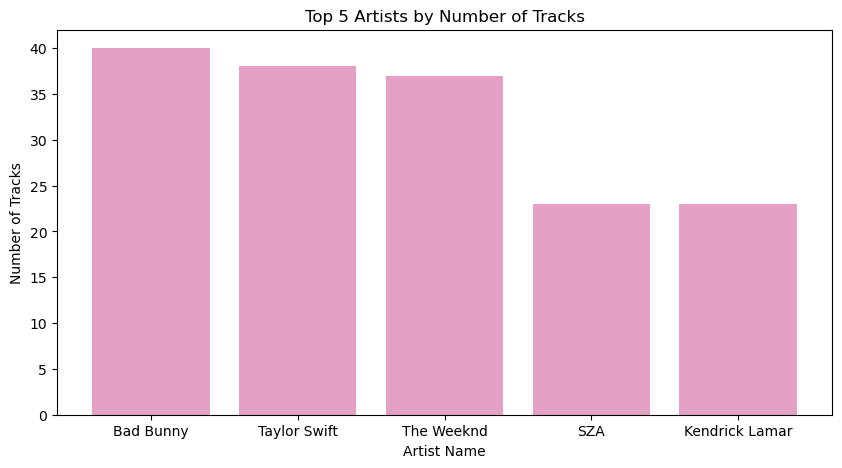

In [30]:
artist_counts = spotify['artist(s)_name'].str.split(', ').explode().value_counts() 
#.str.split is used to split each string in the artist name column and have a condition that each commas
#.explode helps to when the data is separated, it gets its own row in the DataFrame
#.value_counts stores the value inside the artist_count variable

top_artists = artist_counts.nlargest(5) #.nlargest is used to get the highest number of frequent artist

# The bar chart displaying the Top 5 Artists by the number of tracks
plt.figure(figsize=(10, 5))
plt.bar(top_artists.index, top_artists.values, color='#E5A0C6')
plt.xlabel("Artist Name")
plt.ylabel("Number of Tracks")
plt.title("Top 5 Artists by Number of Tracks")
plt.show()

### <font color='255C99'>Top 5 Artists by Number of Tracks are: </font>

Bad Bunny that has 40 tracks, Taylor Swift that has 38 tracks, The Weeknd that has 37 tracks, SZA that has 23 tracks, and Kenrick Lamar that also has 23 tracks. 23

# <font color='1db954'>Temporal Trends</font>

# <font color='535353'>Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year?</font>

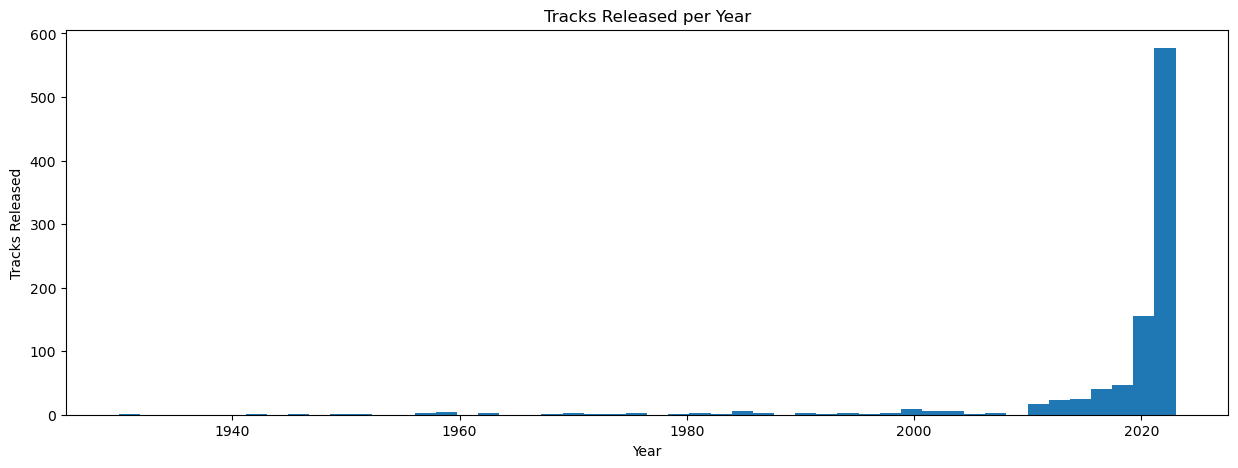

In [35]:
# Plotting the number of tracks released per year
plt.figure(figsize=(15, 5))
plt.hist(spotify['released_year'], bins=50)
plt.xlabel('Year')
plt.ylabel('Tracks Released')
plt.title('Tracks Released per Year')
plt.show()

from 1930 to 1954, there are no tracks released.

in 1954-1958: 5 tracks released. 
    
in 1958-1962: 2 tracks released.
    
in 1962-1966: 3 tracks released.
    
in 1966-1970: 3 tracks released.
    
in 1970-1974: 2 tracks released.
    
in 1974-1978: 2 tracks released.
    
in 1978-1982: 3 tracks released. 
    
in 1982-1986: 9 tracks released.
    
in 1986-1990 there are no tracks released.
    
in 1990-1994: 4 tracks released.
    
in 1994-1998: 5 tracks released.
    
in 1998-2002: 15 tracks released.
    
in 2002-2006: 7 tracks released.
    
in 2006-2010: 10 tracks released.
    
in 2010-2014: 46 tracks released.
    
in 2014-2018: 62 tracks released.
    
in 2018-2022: 594 tracks released.
    
in 2022-present: 175 track released.

# <font color='535353'>Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?</font>

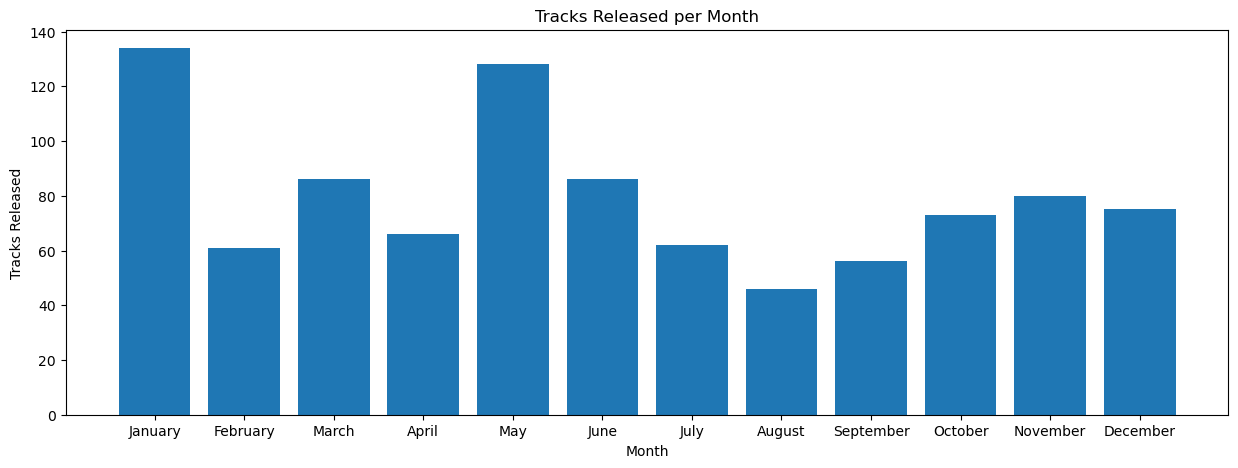

In [39]:
monthly_counts = spotify['released_month'].value_counts().sort_index()

month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

monthly_counts.index = monthly_counts.index.map(month)

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Tracks Released')
plt.title('Tracks Released per Month')

plt.show()

On the month of January, there's approximately 135 tracks released which is the highest among all months.

On the month of February, there's 60 tracks relased.

On he month of March, there's approximately 85 tracks released.

On the month of April, there's approximately 65 tracks released.

On the month of May, there's 130 tracks released.

On the month of June, there's approximately 85 tracks released.

On the month of July, there's 60 tracks released.

On the month of August, there's approximately 50 tracks released.

On the month of September, there's approximately 55 tracks released.

On the month of October, there's approximately 88 tracks released.

On the month of November, there's 80 tracks released.

On the month of December, there's approximately 89 tracks released.

# <font color='1db954'>Genre and Music Characteristics</font>

# <font color='535353'>Examine the correlation between streams and musical attributes like bpm, danceability_% and energy_%. Which attributes seem to influence streams the most?</font>

# Correlation for streams and bpm

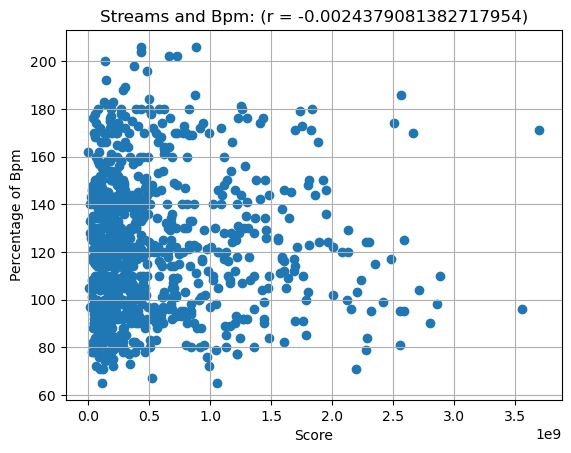

In [45]:
streams_bpm_correl = spotify['streams'].corr(spotify['bpm'])

# Scatter plot of Streams and Bpm
plt.scatter(spotify['streams'],spotify['bpm'])
plt.title(f'Streams and Bpm: (r = {streams_bpm_correl})')
plt.xlabel('Score')
plt.ylabel('Percentage of Bpm')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and bpm is -0.0024379081382717954 which means no relationship. </font>

# Correlation for streams and danceability

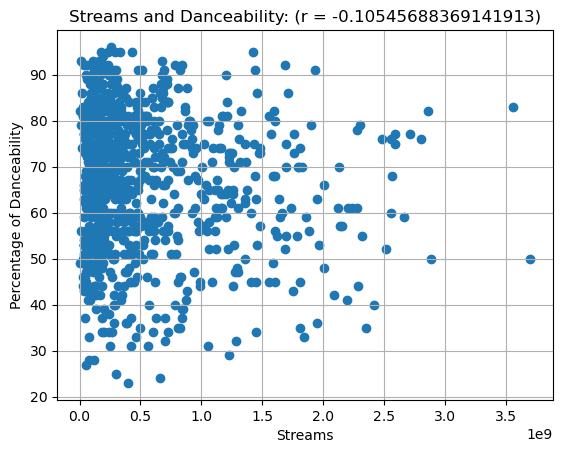

In [49]:
streams_danceability_correl = spotify['streams'].corr(spotify['danceability_%'])

# Scatter plot for Streams and Danceability
plt.scatter(spotify['streams'], spotify['danceability_%'])
plt.title(f'Streams and Danceability: (r = {streams_danceability_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Danceability')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and danceability is -0.10545688369141913 which means no relationship. </font>

# Correlation for streams and energy

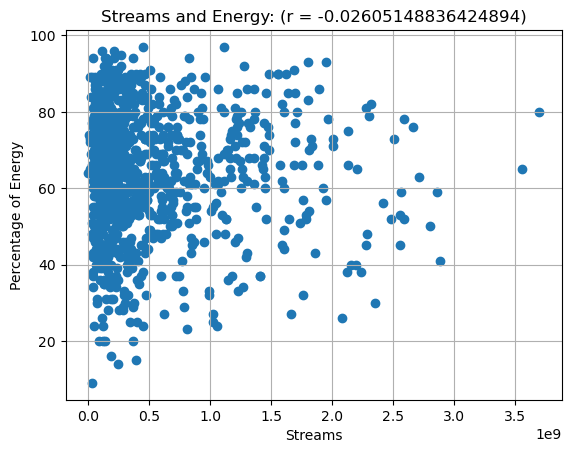

In [53]:
streams_energy_correl = spotify['streams'].corr(spotify['energy_%'])

# Scatter plot for Streams and Energy
plt.scatter(spotify['streams'], spotify['energy_%'])
plt.title(f'Streams and Energy: (r = {streams_energy_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Energy')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and energy is -0.0260514883642489 which means no relationship.</font>

# Correlation for streams and valence

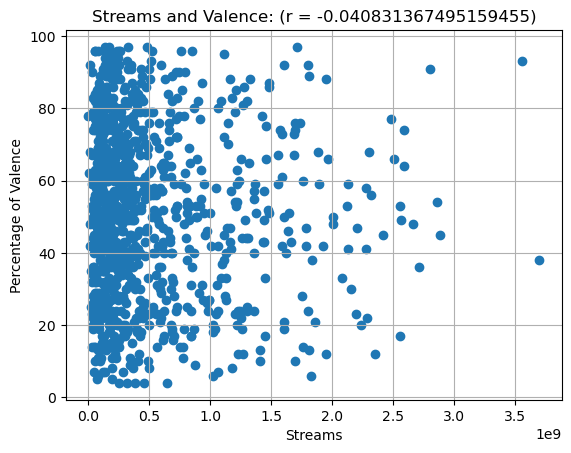

In [57]:
streams_valence_correl = spotify['streams'].corr(spotify['valence_%'])

# Scatter plot for Streams and Valence
plt.scatter(spotify['streams'], spotify['valence_%'])
plt.title(f'Streams and Valence: (r = {streams_valence_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Valence')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and valence is -0.040831367495159455 which means no relationship.</font>

# Correlation for streams and acousticness

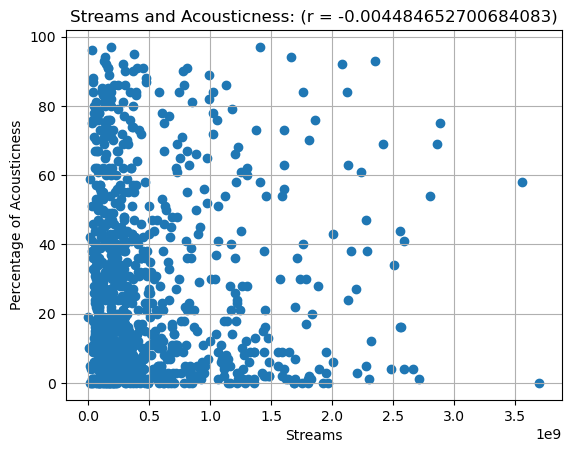

In [61]:
streams_acousticness_correl = spotify['streams'].corr(spotify['acousticness_%'])

# Scatter plot for Streams and Acousticness
plt.scatter(spotify['streams'], spotify['acousticness_%'])
plt.title(f'Streams and Acousticness: (r = {streams_acousticness_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Acousticness')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and acousticness is -0.004484652700684083 which means no relationship.</font>

# Correlation for streams and instrumentalness

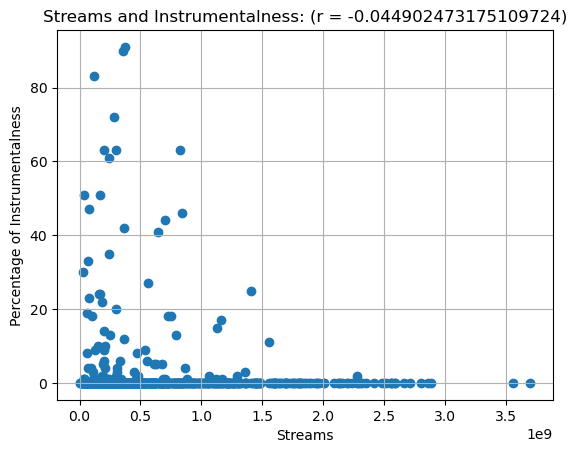

In [65]:
streams_instrument_correl = spotify['streams'].corr(spotify['instrumentalness_%'])

# Scatter plot for Streams and Instrumentalness
plt.scatter(spotify['streams'], spotify['instrumentalness_%'])
plt.title(f'Streams and Instrumentalness: (r = {streams_instrument_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Instrumentalness')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and instrumentalness is -0.044902473175109724 which means no relationship.</font>

# Correlation for streams and liveness

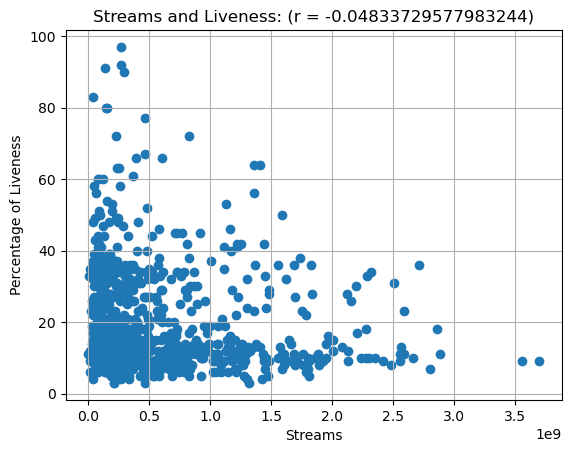

In [69]:
streams_liveness_correl = spotify['streams'].corr(spotify['liveness_%'])

# Scatter plot for Streams and Liveness
plt.scatter(spotify['streams'], spotify['liveness_%'])
plt.title(f'Streams and Liveness: (r = {streams_liveness_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Liveness')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and liveness is-0.04833729577983244 which means no relationship.</font>

# Correlation for streams and speechiness

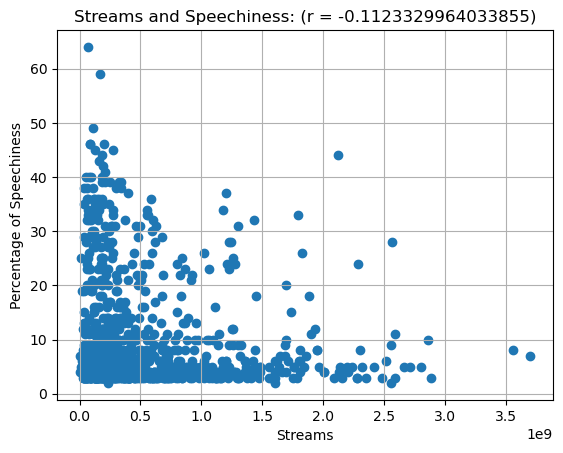

In [73]:
streams_speechiness_correl = spotify['streams'].corr(spotify['speechiness_%'])

# Scatter plot for Streams and Speechiness
plt.scatter(spotify['streams'], spotify['speechiness_%'])
plt.title(f'Streams and Speechiness: (r = {streams_speechiness_correl})')
plt.xlabel('Streams')
plt.ylabel('Percentage of Speechiness')
plt.grid(True)
plt.show()

### <font color='255C99'>The correlation between streams and speechiness is -0.1123329964033855 which means no relationship.</font>

# <font color='535353'>Is there a correlation between danceablity_% and energy_%? How about valence_% and acousticness_%?</font>

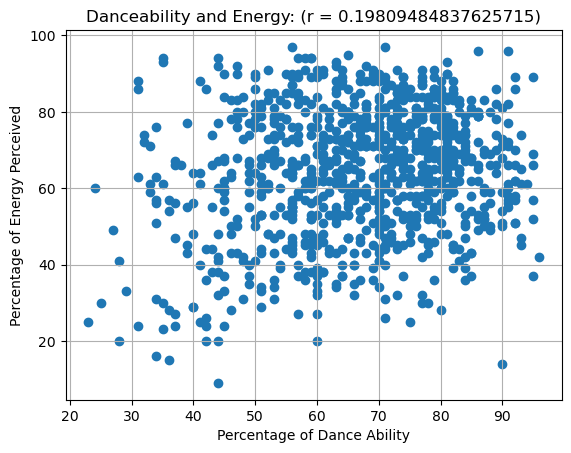

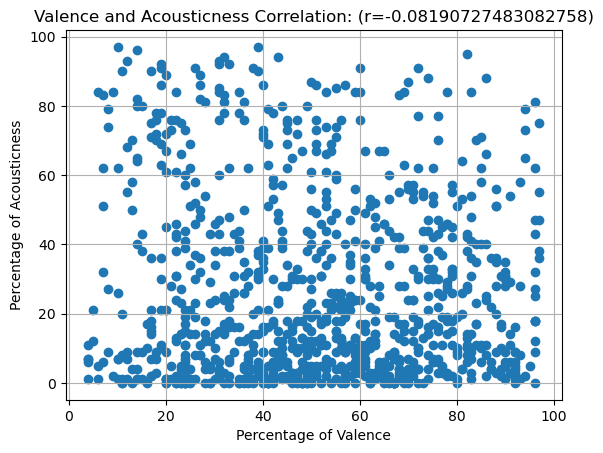

In [77]:
dance_energy_correl = spotify['danceability_%'].corr(spotify['energy_%']) # Finding the correlation of danceability and energy value with the use of .corr
valence_acous_correl =spotify['valence_%'].corr(spotify['acousticness_%']) # Finding the correlation of valence and acousticness value with the use of .corr

# Using the scatter plot for visual representation of correlation for danceability and energy
plt.scatter(spotify['danceability_%'],spotify['energy_%'])
plt.title(f'Danceability and Energy: (r = {dance_energy_correl})')
plt.xlabel('Percentage of Dance Ability')
plt.ylabel('Percentage of Energy Perceived')
plt.grid(True)
plt.show()

# Using the scatter plot for visual representation of correlation for valence and energy and acousticness
plt.scatter(spotify['valence_%'], spotify['acousticness_%']) # Sorted_valence is in the x-axis and the sorted_acousticness is in the y-axis
plt.title(f'Valence and Acousticness Correlation: (r={valence_acous_correl})')
plt.xlabel('Percentage of Valence')
plt.ylabel('Percentage of Acousticness')
plt.grid(True)
plt.show()

### <font color='255C99'>The corrrelation between dance ability and energy is WEAK because the value is r = 0.19809484837625715 and the correlation between valence and acousticness is NO RELATIONSHIP because the value of r is -0.08190727483082758.</font>

# <font color='1db954'>Platform Populatrity</font>

# <font color='535353'>How do numbers of tracks in spotify_playlist, spotify_charts, and apple_playlist compare?</font>

In [82]:
spotify_playlists_total = spotify['in_spotify_playlists'].sum()
spotify_charts_total = spotify['in_spotify_charts'].sum()
apple_playlists_total = spotify['in_apple_playlists'].sum()


print(f"In Spotify playlists: {spotify_playlists_total}")
print(f"In Spotify charts: {spotify_charts_total}")
print(f"In Apple playlists: {apple_playlists_total}")

In Spotify playlists: 4955719
In Spotify charts: 11445
In Apple playlists: 64625


### <font color='255C99'>The total appearances in Spotify playlists is 4955719, the total appearances in Spotify charts is 11445, and the otal appearances in Apple playlists is 64625.</font>

# <font color='535353'>Which platform seems to be favor the most popular tracks?</font>

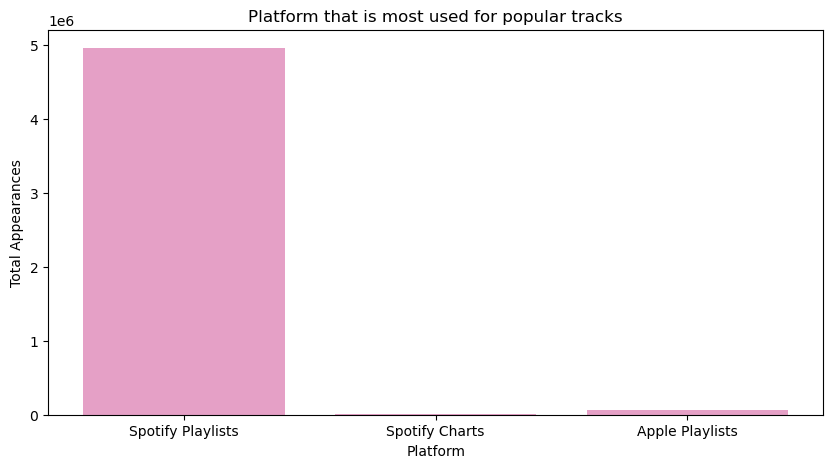

In [86]:
playlist_charts = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
totals = [spotify_playlists_total, spotify_charts_total, apple_playlists_total]


# The bar chart displaying the the platform that is most used for popular tracks
plt.figure(figsize=(10, 5))
plt.bar(playlist_charts, totals, color='#E5A0C6')
plt.xlabel('Platform')
plt.ylabel('Total Appearances')
plt.title('Platform that is most used for popular tracks')
plt.show()

### <font color='255C99'>The Spotify playlist is the number one for streaming the popular tracks</font>.

# <font color='1db954'>Advance Analysis</font>

# <font color='535353'>Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?</font>

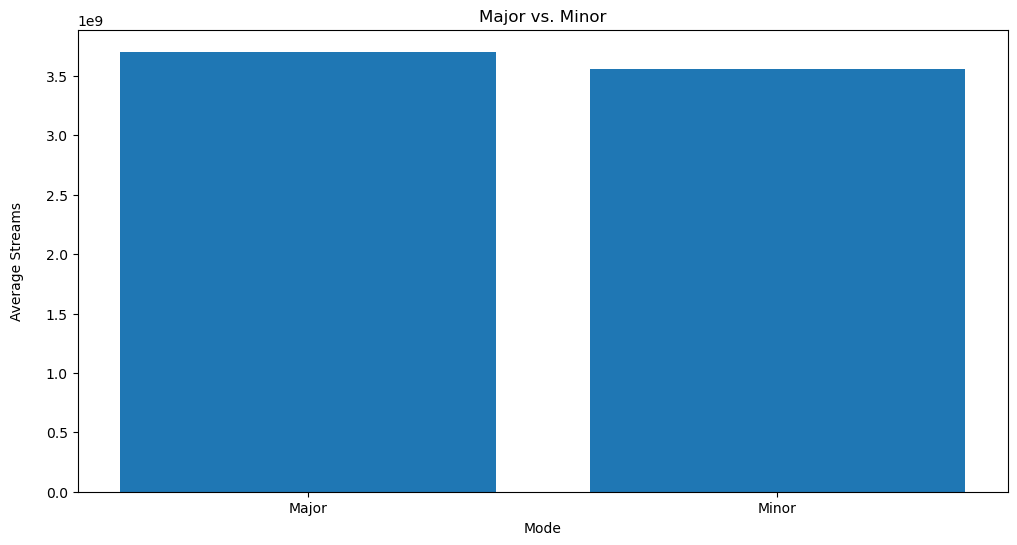

In [91]:
# Plot distribution of streams and mode (Major vs. Minor)
plt.figure(figsize=(12, 6))
plt.bar(spotify['mode'], spotify['streams'])
plt.title('Major vs. Minor')
plt.xlabel('Mode')
plt.ylabel('Average Streams\n')
plt.show()

## <font color='255C99'>The total major is 550 and the total minor is 403. The y-axis values is in scientific notation and expressed in E+11 except for 0.5 which makes it easier to read for the average streams</font>.

# <font color='535353'>Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.</font>

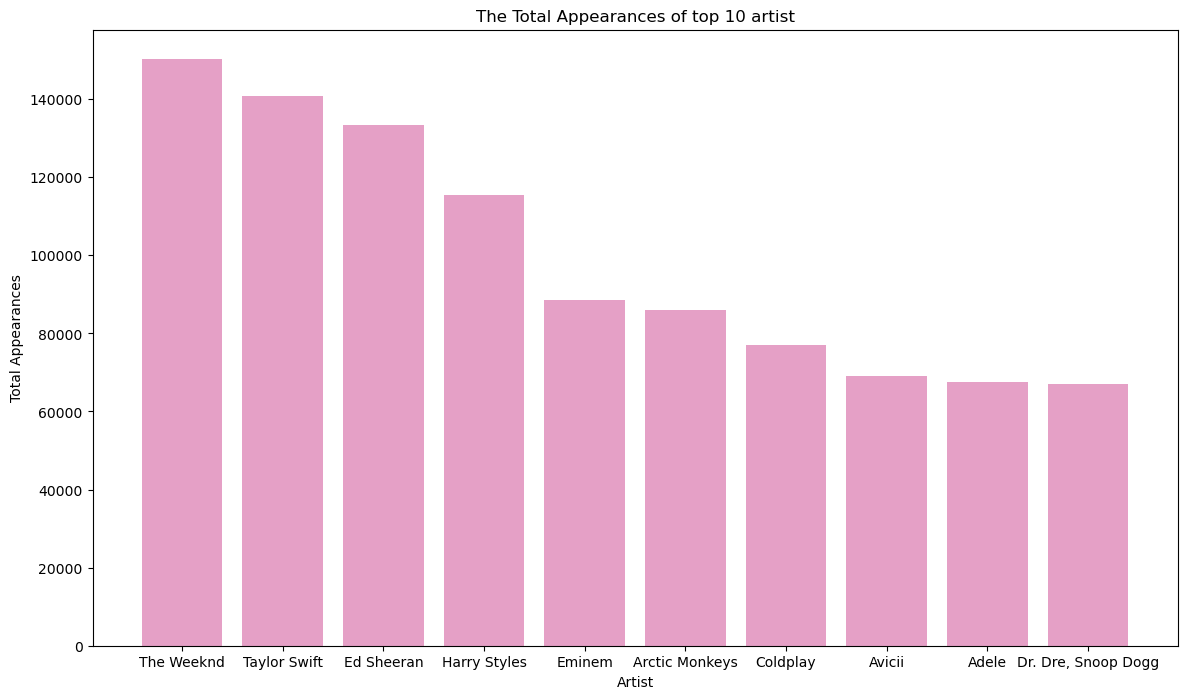

In [95]:
# Putting all the playlist and chart into an array 
playlist_chart= ['in_spotify_playlists', 'in_spotify_charts', 
                  'in_apple_playlists', 'in_apple_charts', 
                  'in_deezer_playlists', 'in_deezer_charts', 
                  'in_shazam_charts']

# Convert columns to numeric (if they are not already)
spotify[playlist_chart] = spotify[playlist_chart].apply(pd.to_numeric, errors='coerce')

# Grouping the artist and sum across all playlist/chart columns
artist_totals = spotify.groupby('artist(s)_name')[playlist_chart].sum()

# By finding the total using the .sum, axis 1 is used to create a single row for the total per artists.
artist_totals['Total_Appearances'] = artist_totals.sum(axis=1)

# Finding the top 10 most frequent artists acrross the playlists and charts using the .nlargest 
top10_artist = artist_totals.nlargest(10, 'Total_Appearances')


# Making a bar graph for it
plt.figure(figsize=(14, 8))
plt.bar(top10_artist.index, top10_artist['Total_Appearances'], color='#E5A0C6')
plt.xlabel("Artist")
plt.ylabel("Total Appearances")
plt.title("The Total Appearances of top 10 artist")
plt.show()

                             in spotify playlists    in spotify charts  
artist(s)_name                                                 
The Weeknd                         144053                180   
Taylor Swift                       132974                542   
Ed Sheeran                         128758                 94   
Harry Styles                       110026                185   
Eminem                              87331                152   
Arctic Monkeys                      84016                190   
Coldplay                            75716                 72   
Avicii                              68241                 42   
Adele                               65049                 69   
Dr. Dre, Snoop Dogg                 65728                  0   

                     in apple playlists        in apple charts    in deezer playlists  
artist(s)_name                                                                  
The Weeknd                         1677             1348               2138.0   
Taylor Swift                       1796             1866               1708.0   
Ed Sheeran                         1448              488               1702.0   
Harry Styles                       1741              545               2483.0   
Eminem                              475              281                  0.0   
Arctic Monkeys                      241              340               1170.0   
Coldplay                            381               25                805.0   
Avicii                              407              282                  0.0   
Adele                               646              331                856.0   
Dr. Dre, Snoop Dogg                 283              118                  0.0   

                     in deezer charts       in shazam charts    Total Appearances  
artist(s)_name                                                              
The Weeknd                         23             854.0           150273.0  
Taylor Swift                       58            1811.0           140755.0  
Ed Sheeran                         43             874.0           133407.0  
Harry Styles                       76             282.0           115338.0  
Eminem                             12             272.0            88523.0  
Arctic Monkeys                      6             101.0            86064.0  
Coldplay                           10               0.0            77009.0  
Avicii                              1             101.0            69074.0  
Adele                              29             606.0            67586.0  
Dr. Dre, Snoop Dogg                 2             953.0            67084.0  